In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import time

In [3]:
(train_images, train_labels), (test_images,test_labels) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


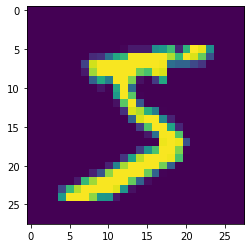

In [4]:
plt.imshow(train_images[0])

In [6]:
train_images= train_images.reshape(train_images.shape[0],28,28,1)

In [7]:
train_images=(train_images-127.5)/127.5

In [8]:
BUFFER_SIZE=train_images.shape[0]
BATCH_SIZE=100
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# DISCRIMINATOR MODEL

In [11]:
def make_discriminator_model():
  model=tf.keras.Sequential()
  model.add(tf.keras.layers.Conv2D(7,(3,3),padding='same',input_shape=(28,28,1)))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.LeakyReLU())
  model.add(tf.keras.layers.Dense(50,activation='relu'))
  model.add(tf.keras.layers.Dense(1))
  return model

In [12]:
model_descriminator = make_discriminator_model()

In [13]:
model_descriminator(np.random.rand(1,28,28,1).astype('float32'))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.24457456]], dtype=float32)>

In [14]:
discriminator_optimizer = tf.optimizers.Adam(1e-3)

In [15]:
def get_discriminator_loss(real_predictions,fake_predictions):
  real_predictions=tf.sigmoid(real_predictions)
  fake_predictions=tf.sigmoid(fake_predictions)
  real_loss = tf.losses.binary_crossentropy(tf.ones_like(real_predictions),real_predictions)
  fake_loss = tf.losses.binary_crossentropy(tf.zeros_like(fake_predictions),fake_predictions)
  return fake_loss+real_loss

# GENERATOR MODEL

In [23]:
def make_generator_model():
  model=tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(7*7*256,input_shape=(100,)))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Reshape((7,7,256)))
  model.add(tf.keras.layers.Conv2DTranspose(128,(3,3),padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2DTranspose(64,(3,3),strides=(2,2),padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2DTranspose(1,(3,3),strides=(2,2),padding='same'))
  return model

In [24]:
generator = make_generator_model()

In [25]:
generator_optimizer = tf.optimizers.Adam(1e-4)

In [26]:
def get_generator_loss(fake_predictions):
  fake_predictions=tf.sigmoid(fake_predictions)
  fake_loss=tf.losses.binary_crossentropy(tf.ones_like(fake_predictions),fake_predictions)
  return fake_loss

# TRAINING

In [27]:
def train(dataset,epochs):
  for _ in range(epochs):
    for images in dataset:
      images=tf.cast(images,tf.dtypes.float32)
      train_step(images)

In [29]:
def train_step(images):
  fake_image_noise=np.random.randn(BATCH_SIZE,100).astype('float32')
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_images= generator(fake_image_noise)
    real_output= model_descriminator(images)
    fake_output= model_descriminator(generated_images)

    gen_loss=get_generator_loss(fake_output)
    disc_loss=get_discriminator_loss(real_output,fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss,generator.trainable_variables)
    gradients_of_discriminator =  disc_tape.gradient(disc_loss,model_descriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator,generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator,model_descriminator.trainable_variables))

    print('generator loss', np.mean(gen_loss))
    print('Discriminator loss', np.mean(disc_loss))

In [31]:
train(train_dataset,2)

generator loss 0.6897042
Discriminator loss 1.4835062
generator loss 0.6859799
Discriminator loss 0.7198375
generator loss 0.6931382
Discriminator loss 0.69466245
generator loss 0.709691
Discriminator loss 0.677184
generator loss 0.7293161
Discriminator loss 0.65851176
generator loss 0.7578304
Discriminator loss 0.63270825
generator loss 0.7901924
Discriminator loss 0.60499614
generator loss 0.83006287
Discriminator loss 0.57297397
generator loss 0.8816442
Discriminator loss 0.53511614
generator loss 0.93959725
Discriminator loss 0.49623185
generator loss 1.0020733
Discriminator loss 0.4582157
generator loss 1.0851996
Discriminator loss 0.4128911
generator loss 1.1759248
Discriminator loss 0.36997998
generator loss 1.2750821
Discriminator loss 0.32903928
generator loss 1.387954
Discriminator loss 0.28864333
generator loss 1.5219508
Discriminator loss 0.24762039
generator loss 1.6444459
Discriminator loss 0.21616717
generator loss 1.831244
Discriminator loss 0.1765224
generator loss 2.0

KeyboardInterrupt: ignored